In [36]:
# Analyse de données
import pandas as pd
import numpy as np
from datetime import datetime
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Découpage du dataset
from sklearn.model_selection import train_test_split
# Modélisation
from sklearn.linear_model import LinearRegression
# métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
df = pd.read_csv('raw_data/carData.csv')

## Nettoyage et préparation des données

In [38]:
# Ajout de la variable âge : Car_Age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Stratification de 'Selling_Price' en 'Price_Category'
df['Price_Category'] = np.ceil(df['Selling_Price'] /1.5)
df['Price_Category'] = df['Price_Category'].where(df['Price_Category'] <5, 5.0)

# Standardisation des Prix d'usine et de vente et du kilométrage
scaler = StandardScaler()
df[['Selling_Price_Std', 'Present_Price_Std', 'Kms_Std']] = scaler.fit_transform(df[['Selling_Price', 'Present_Price', 'Kms_Driven']])

# Conversion des variables qualitatives en variables quantitatives
df["Fuel_Type_numeric"] = df["Fuel_Type"].map({"Petrol": 1, "Diesel": 2, "CNG": 3})
df["Seller_Type_numeric"] = df["Seller_Type"].map({"Dealer": 1, "Individual": 2})
df["Transmission_numeric"] = df["Transmission"].map({"Manual": 0, "Automatic": 1})

# Filtrer le DataFrame pour ne garder que les colonnes utiles
df_filtered = df[['Car_Age', 'Selling_Price', 'Present_Price','Kms_Driven', 'Owner',  "Fuel_Type_numeric", "Seller_Type_numeric", "Transmission_numeric"]]
df_standardized = df[['Car_Age', 'Selling_Price_Std', 'Present_Price_Std','Kms_Std', 'Owner',  "Fuel_Type_numeric", "Seller_Type_numeric", "Transmission_numeric"]]

## Selection de la variable explicative et de la variable à expliquer

In [39]:
# features
X = df_filtered[['Present_Price']]

X_std = df_standardized[['Present_Price_Std']]

# Target
y = df_filtered["Selling_Price"]

y_std = df_standardized["Selling_Price_Std"] 

## Division du dataset : jeu d'entrainement, jeu de test

In [40]:
# Jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrainement du modèle

In [41]:
# Entraînement du modèle
lin_reg = LinearRegression()
lin_reg_std = LinearRegression()

lin_reg.fit(X_train, y_train)
lin_reg_std.fit(X_std_train, y_std_train)

LinearRegression()

## Prédiction

In [42]:
# Prédictions sur le set de test
y_pred = lin_reg.predict(X_test)

y_std_pred = lin_reg.predict(X_std_test)


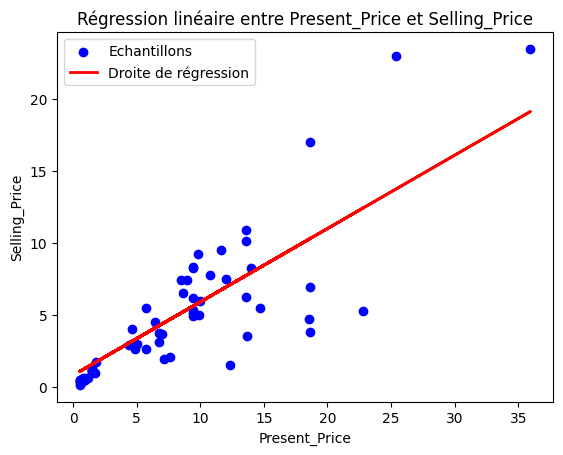

In [43]:
plt.scatter(X_test, y_test, color='blue', label="Echantillons")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Droite de régression")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("Régression linéaire entre Present_Price et Selling_Price")
plt.legend()


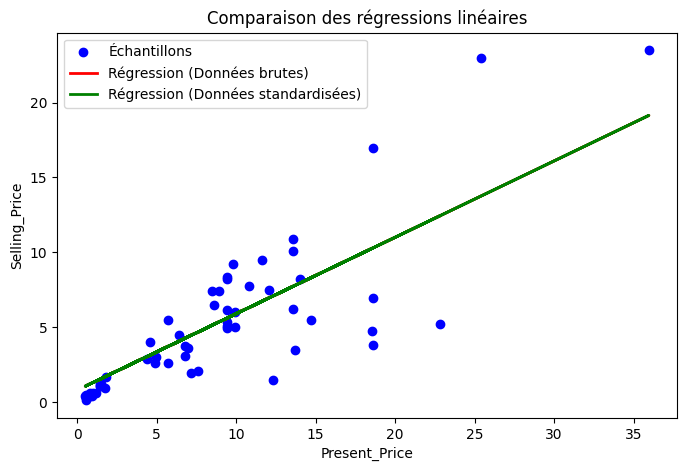

In [46]:
plt.figure(figsize=(8, 5))

# Nuage de points des données test
plt.scatter(X_test, y_test, color='blue', label="Échantillons")

# Droite de régression avec données brutes (rouge)
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Régression (Données brutes)")

# Droite de régression avec données standardisées (vert)
plt.plot(X_std_test, y_std_pred, color='green', linewidth=2, label="Régression (Données standardisées)")

# Labels et titre
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("Comparaison des régressions linéaires")
plt.legend()

plt.show()


## Métriques

Métriques avant standardisation :<br>
MAE: 1.8068994272334893, MSE: 7.202032610310123, RMSE: 2.6836603008410216

In [45]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 1.8068994272334893, MSE: 7.202032610310123, RMSE: 2.6836603008410216
